In [ ]:
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
# save_path = 'dataset.zip'

# def unzip_file(zip_file, extract_dir):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(extract_dir)

# extract_dir = 'extracted_data'
# unzip_file(save_path, extract_dir)
exec("__import__('zipfile').ZipFile(r'C:\\Users\\admin\\Downloads\\dataset.zip').extractall('extracted_data')")


In [ ]:
import os

extract_dir = 'extracted_data'
data_dir = os.path.join(extract_dir, 'garbage_classification')
labels = os.listdir(data_dir)
image_size = (150, 150)
batch_size = 32
num_classes = len(labels)



In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


data_generator = train_datagen.flow_from_directory(
    os.path.join(extract_dir, 'garbage_classification'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 15515 images belonging to 12 classes.


In [ ]:
# X, y = data_generator.next()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y = data_generator.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
# y_pred = model.predict(X_test)

# # Generating confusion matrix and classification report
# y_pred_classes = np.argmax(y_pred, axis=1)
# confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
# print("Confusion Matrix:\n", confusion_mtx)
# print("\nClassification Report:\n", classification_report(np.argmax(y_test, axis=1), y_pred_classes))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.0764 - accuracy: 0.0400 - val_loss: 0.0760 - val_accuracy: 0.1429
Epoch 2/10
1/1 [==============================] - 0s 441ms/step - loss: 0.0761 - accuracy: 0.0400 - val_loss: 0.0752 - val_accuracy: 0.2857
Epoch 3/10
1/1 [==============================] - 0s 461ms/step - loss: 0.0751 - accuracy: 0.2400 - val_loss: 0.0738 - val_accuracy: 0.4286
Epoch 4/10
1/1 [==============================] - 0s 487ms/step - loss: 0.0734 - accuracy: 0.4000 - val_loss: 0.0737 - val_accuracy: 0.4286
Epoch 5/10
1/1 [==============================] - 0s 441ms/step - loss: 0.0734 - accuracy: 0.4000 - val_loss: 0.0737 - val_accuracy: 0.4286
Epoch 6/10
1/1 [==============================] - 0s 456ms/step - loss: 0.0734 - accuracy: 0.4000 - val_loss: 0.0737 - val_accuracy: 0.4286
Epoch 7/10
1/1 [==============================] - 0s 430ms/step - loss: 0.0733 - accuracy: 0.4000 - val_loss: 0.0737 - val_accuracy: 0.4286
Epoch 8/10
1/1 [=======

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
# Generating confusion matrix and classification report
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
print("Confusion Matrix:\n", confusion_mtx)
print("\nClassification Report:\n", classification_report(np.argmax(y_test, axis=1), y_pred_classes))

1/1 [==============================] - 0s 85ms/step
Confusion Matrix:
 [[0 1 0 0 0]
 [0 3 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.43      1.00      0.60         3
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1

    accuracy                           0.43         7
   macro avg       0.09      0.20      0.12         7
weighted avg       0.18      0.43      0.26         7



C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

1/1 [==============================] - 0s 39ms/step


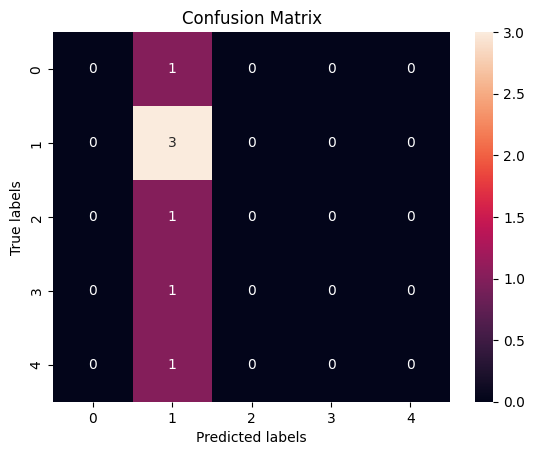

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
# plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()